# Import

In [1]:
# Import Python Frameworks#
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

# Load Data

In [2]:
# path to files
path = r'C:\Users\Patri\Documents\Udacity\Introduction_dataScience\Write_BlogPost_Project\Airbnb_Dataset'

# filenames
calendar = 'calendar.csv'
listings = 'listings.csv'
reviews = 'reviews.csv'

# list of filenames
filenames = [calendar, listings, reviews]

# load filenames
if os.path.exists(path):
    for file in filenames:
        temp_file = os.path.join(path, file)
        if os.path.isfile(temp_file):
            df_name = temp_file.split('/')[-1]
            if 'calendar' in df_name:
                df_calendar = pd.read_csv(temp_file)
            elif 'listings' in df_name:
                df_listings = pd.read_csv(temp_file)
            else:
                df_reviews = pd.read_csv(temp_file)

# Data Preparation

First we have a look at the whole dataset. After this we clean df_calendar and df_reviews in short, because we dont use them for our analysis (model). So the steps will not explained in detail.

In [3]:
print(f'There are: {df_calendar.shape[0]} lines and {df_calendar.shape[1]} columns in calendar dataset.')
print(f'There are: {df_listings.shape[0]} lines and {df_listings.shape[1]} columns in listings dataset.')
print(f'There are: {df_reviews.shape[0]} lines and {df_reviews.shape[1]} columns in reviews dataset.')

There are: 1308890 lines and 4 columns in calendar dataset.
There are: 3585 lines and 95 columns in listings dataset.
There are: 68275 lines and 6 columns in reviews dataset.


In [4]:
df_calendar.isnull().sum()  # dont have null values

listing_id         0
date               0
available          0
price         665853
dtype: int64

In [5]:
df_calendar.dtypes  # shows data-types; see that price isn´t correct datatype; have to be float 

listing_id     int64
date          object
available     object
price         object
dtype: object

## Clean Dataset calendar

In [6]:
df_calendar.head()  # shows first 5 rows of dataset

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [7]:
df_calendar = df_calendar.drop(columns=['date', 'available'])  # drop columns date and available

In [8]:
df_calendar.head(2)  # shows second time, first 5 rows of dataset

,listing_id,price
0,12147973,NaN
1,12147973,NaN


In [9]:
df_calendar[df_calendar.price.notna()][['price']].head()  # see that price have $ sign in; should be replaced

,price
365,$65.00
366,$65.00
367,$65.00
368,$75.00
369,$75.00


In [10]:
df_calendar['price'] = df_calendar.price.rename({'price' : 'price in $'})  # rename price with price in $
df_calendar.price = df_calendar.price.str.replace('$', '', regex=True)  # remove $ by empty string
df_calendar.price = df_calendar.price.fillna(0)

In [11]:
df_calendar.price.isnull().sum()  # dont have null values inside column price

0

In [12]:
df_calendar[df_calendar['price'].str.contains(',', na=False, regex=True)][['price']].head()  # also column price exists comma

,price
110179,"7,163.00"
224963,"1,020.00"
224964,"1,027.00"
224965,"1,027.00"
224966,"1,027.00"


In [13]:
df_calendar.price = df_calendar.price.replace(',', '', regex=True)  # replace comma by empty String

In [14]:
df_calendar.price = df_calendar.price.astype('float')  # column price datatype is casting to float

In [15]:
any(df_calendar.isna().sum())  # second check, if whole dataset haven´t null values

False

In [16]:
df_calendar.dtypes  # second check, if datatypes are correct

listing_id      int64
price         float64
dtype: object

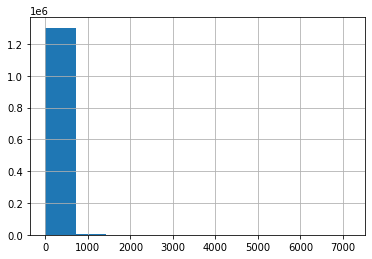

In [17]:
df_calendar.price.hist()  # show histogram of column price
plt.show()

For further analysis and a better distribution, just prepare data (see below, it´s shown on df_listings as example). It´s your turn! 

## Clean Dataset reviews

In [18]:
df_reviews.head(3)  # shows the first 3 rows of dataset

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...


In [19]:
df_reviews.dtypes  # shows datatypes of columns

listing_id        int64
id                int64
date             object
reviewer_id       int64
reviewer_name    object
comments         object
dtype: object

In [20]:
# fill null values in column comment with "no comment"
df_reviews.loc[df_reviews.comments.isna(), 'comments'] = df_reviews['comments'].fillna('no comment')

In [21]:
df_reviews.isna().sum()  # show amount of null values in columns

listing_id       0
id               0
date             0
reviewer_id      0
reviewer_name    0
comments         0
dtype: int64

In [22]:
df_reviews.duplicated(subset=['id']).sum()  # no duplicated id´s; 
# Attention/Hint: listing_id is duplicated 

0

## Clean Dataset listings

In [23]:
df_listings.head(2)  # shows the first 2 rows of dataset

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.3


First we make a list of non interesting columns. These are not relevant for our analysis. So we can drop them below.

In [24]:
col_non_interest = ['listing_url', 'scrape_id', 'last_scraped', 'summary', 'space', 'description',
                    'experiences_offered', 'neighborhood_overview', 'notes', 'name', 'transit', 
                    'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 
                    'xl_picture_url', 'host_url', 'host_since', 'host_about', 'jurisdiction_names',
                    'require_guest_profile_picture', 'require_guest_phone_verification', 'host_thumbnail_url',
                    'host_picture_url', 'amenities', 'neighbourhood_cleansed', 'neighbourhood', 'latitude', 
                    'longitude', 'license', 'host_location', 'host_response_time', 'first_review', 'last_review',
                    'host_verifications', 'host_listings_count', 'requires_license', 'cleaning_fee']

In [25]:
df_listings.drop(columns=col_non_interest, axis=1, inplace=True)  # drop columns col_non_interest

In [26]:
print('Final there are: {} rows in dataset.'.format(df_listings.shape[1]))

Final there are: 55 rows in dataset.


In [27]:
df_listings['price'].head(3)  # you can see price is datatype object, thats not what we want. Just we have to remove $.

0    $250.00
1     $65.00
2     $65.00
Name: price, dtype: object

In column price there are $ signs inside. It´s the same like df_calendar (see above). So we can remove them and rename our column for guilty unit.  

In [28]:
df_listings['price'] = df_listings.price.rename({'price' : 'price in $'})
df_listings.price = df_listings.price.str.replace('$', '', regex=True)

It´s also same like df_calendar we have comma inside (see above). So we can remove comma to change datatype to float.

In [29]:
df_listings[df_listings['price'].str.contains(',', na=False, regex=True)][['price']].head(3)

,price
793,"1,400.00"
1022,"1,300.00"
1262,"1,250.00"


In [30]:
df_listings.price = df_listings.price.str.replace(',', '', regex=True)  # remove comma
df_listings.price = df_listings.price.astype('float')  # casting datatype to float

In [31]:
df_listings['price'].isnull().sum()  # Check amount of null Values in column price

0

Show below for moment, whats the minimum and maximum price for houses or appartements.

In [32]:
print('The minimum of prices are: ', df_listings['price'].min(), '$')
print('The maximum of prices are: ', df_listings['price'].max(), '$')

The minimum of prices are:  10.0 $
The maximum of prices are:  4000.0 $


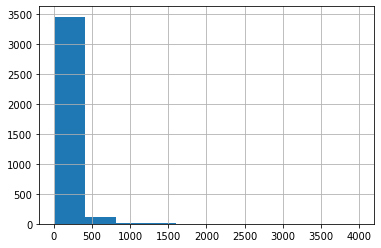

In [33]:
df_listings.price.hist()
plt.show()

Hist plot shows, we have outliers inside prices. It´s a very right skewed curve. So we can use IQR - Rule and drop only extreme outliers. Extreme Outliers are outliers outside 3 * IQR - Range.

In [34]:
# IQR Rule to drop extreme outliers
seventy_fifth_perc = df_listings['price'].quantile(0.75) # obere Grenze
twenty_fifth_perc = df_listings['price'].quantile(0.25) # untere Grenze
price_iqr = seventy_fifth_perc - twenty_fifth_perc
upper_lim = seventy_fifth_perc + (3 * price_iqr)
df_listings = df_listings[df_listings.price <= 625]

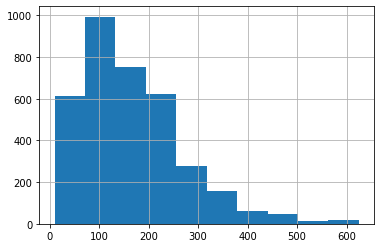

In [35]:
df_listings.price.hist()
plt.show()  # seems like right skewed, but that´s normal characteristic

Seems very good. It´s right skewed but we can explain by real szenario. There are more Appartements and houses with lower prices. But what´s low? This question depents on price developement in every country and differs each continent. 

In [36]:
df_listings.id.duplicated().sum()  # make sure there are no duplicated id´s

0

Now we have a look at rest of columns and there amount of null values.

In [37]:
df_null = df_listings.loc[: , df_listings.isnull().sum() > 0]
df_null.isnull().sum()

host_response_rate               461
host_acceptance_rate             461
host_neighbourhood               336
neighbourhood_group_cleansed    3552
city                               2
zipcode                           38
market                            14
property_type                      3
bathrooms                         14
bedrooms                          10
beds                               9
square_feet                     3497
weekly_price                    2668
monthly_price                   2670
security_deposit                2226
has_availability                3552
review_scores_rating             799
review_scores_accuracy           809
review_scores_cleanliness        804
review_scores_checkin            806
review_scores_communication      804
review_scores_location           808
review_scores_value              807
reviews_per_month                743
dtype: int64

First we drop columns with more than 50% null values inside. Columns in % are listet below.

In [38]:
# filter columns with an amount greather than 50% of null values inside
gt_50_perc = (df_listings.isnull().sum() / df_listings.shape[0]) * 100
gt_50_perc = gt_50_perc.sort_values(ascending=False)
gt_50_perc[gt_50_perc > 50]

has_availability                100.000000
neighbourhood_group_cleansed    100.000000
square_feet                      98.451577
monthly_price                    75.168919
weekly_price                     75.112613
security_deposit                 62.668919
dtype: float64

In [39]:
# drop columns with more than 50% of null values
df_listings = df_listings.drop(columns=['neighbourhood_group_cleansed', 'square_feet', 'weekly_price',
                                        'monthly_price', 'security_deposit', 'has_availability'], axis=1)

Now we hava a look at property_type.

In [40]:
df_listings.property_type.unique()

array(['House', 'Apartment', 'Condominium', 'Villa', 'Bed & Breakfast',
       'Townhouse', 'Entire Floor', 'Loft', 'Guesthouse', 'Boat', 'Dorm',
       'Other', nan, 'Camper/RV'], dtype=object)

There are too much properties to secure 3 rows of property_type. That means we drop them later. The following create list of properties with mean values of bathrooms, bedrooms and beds for each type.

In [41]:
mean_df = df_listings.groupby(by=['property_type'])[['bathrooms', 'bedrooms', 'beds']].mean()
mean_df

,bathrooms,bedrooms,beds
property_type,,,
Apartment,1.155960,1.220845,1.564192
Bed & Breakfast,1.192308,1.024390,1.250000
Boat,1.333333,1.833333,3.833333
Camper/RV,0.000000,0.000000,3.000000
Condominium,1.221491,1.350877,1.671053
Dorm,1.000000,1.000000,1.000000
Entire Floor,1.250000,1.500000,2.250000
Guesthouse,1.000000,2.000000,2.000000
House,1.428051,1.353791,1.724138


We verify amount of null values for bedrooms, beds and bathrooms for each property_type. Than we fill missing values with mean values from each room and beds (see below).  

In [42]:
list(df_listings[df_listings.bedrooms.isnull()].property_type.unique()) # only Apartement is null

['Apartment']

In [43]:
list(df_listings[df_listings.beds.isnull()].property_type.unique())

['Apartment', 'Bed & Breakfast', 'House']

In [44]:
list(df_listings[df_listings.bathrooms.isnull()].property_type.unique())

['House', 'Apartment', 'Bed & Breakfast']

In [45]:
df_listings.loc[df_listings.bedrooms.isnull(), 'bedrooms'] = df_listings.loc[df_listings.property_type == 'Apartment', 'bedrooms'].fillna(round(mean_df.loc['Apartment'].bedrooms, 3))

In [46]:
df_listings.loc[df_listings.beds.isnull(), 'beds'] = df_listings.loc[df_listings.property_type == 'Apartment', 'beds'].fillna(round(mean_df.loc['Apartment'].beds, 3))
df_listings.loc[df_listings.beds.isnull(), 'beds'] = df_listings.loc[df_listings.property_type == 'Bed & Breakfast', 'beds'].fillna(round(mean_df.loc['Apartment'].beds, 3))
df_listings.loc[df_listings.beds.isnull(), 'beds'] = df_listings.loc[df_listings.property_type == 'House', 'beds'].fillna(round(mean_df.loc['Apartment'].beds, 3))

In [47]:
df_listings.loc[df_listings.bathrooms.isnull(), 'bathrooms'] = df_listings.loc[df_listings.property_type == 'House', 'bathrooms'].fillna(round(mean_df.loc['Apartment'].bathrooms, 3))
df_listings.loc[df_listings.bathrooms.isnull(), 'bathrooms'] = df_listings.loc[df_listings.property_type == 'Apartment', 'bathrooms'].fillna(round(mean_df.loc['Apartment'].bathrooms, 3))
df_listings.loc[df_listings.bathrooms.isnull(), 'bathrooms'] = df_listings.loc[df_listings.property_type == 'Bed & Breakfast', 'bathrooms'].fillna(round(mean_df.loc['Apartment'].bathrooms, 3))

In [48]:
# now we drop property_type like mentioned above
df_listings = df_listings.drop(columns=['property_type'], axis=1)

We verify, if we can find pattern to fill missing values in zipcode and marked, but seems there isn´t ones. If so, we can drop these columns.

In [49]:
# Cannot find a pattern to fill zipcodes! It´s possible to find them via Internet, but that´s not the work around yet.
# Also the columns are not needed to answer the Questions. So drop columns below.
df_listings[(df_listings['market'] == 'Boston') & (df_listings['city'] == 'Boston') & (df_listings['host_neighbourhood'] == 'Dorchester')][['zipcode']].head(10)

,zipcode
830,02125
1412,02116
2456,02215
2681,02132
2746,02126
2747,02124
2752,02124
2753,02126
2758,02126
2760,02126


In [50]:
# drop columns zipcode, market and city
df_listings = df_listings.dropna(subset=['zipcode', 'market', 'city'], axis=0)
# Also host_neighbourhood no longer needed
df_listings.drop(columns=['host_neighbourhood'], inplace=True)

Rename columns host_response_rate and host_acceptance_rate with same names and inclusive their units. After replace % sign inside and casting datatype to float.

In [51]:
df_listings.host_response_rate = df_listings.host_response_rate.rename({'host_response_rate' : 'host_response_rate in %'})
df_listings.host_acceptance_rate = df_listings.host_acceptance_rate.rename({'host_acceptance_rate' : 'host_acceptance_rate in %'})

In [52]:
df_listings.host_response_rate = df_listings.host_response_rate.str.replace('%', '')
df_listings.host_acceptance_rate = df_listings.host_acceptance_rate.str.replace('%', '')
df_listings.host_response_rate = df_listings.host_response_rate.astype('float')
df_listings.host_acceptance_rate = df_listings.host_acceptance_rate.astype('float')

Now let´s have a look at values with missing values less than 50% and at least one.

In [53]:
# Rest of missing values in percent
gt_50_perc = (df_listings.isnull().sum() / df_listings.shape[0]) * 100
gt_50_perc = gt_50_perc.sort_values(ascending=False)
lt_50_perc_gt_0_perc = gt_50_perc[(gt_50_perc > 0) & (gt_50_perc < 50)]
lt_50_perc_gt_0_perc

review_scores_accuracy         22.527158
review_scores_location         22.498571
review_scores_value            22.469983
review_scores_checkin          22.441395
review_scores_cleanliness      22.384220
review_scores_communication    22.384220
review_scores_rating           22.241281
reviews_per_month              20.640366
host_acceptance_rate           13.007433
host_response_rate             13.007433
dtype: float64

We can see that first 8 columns with null values have nearly same amount of missing values and last two columns also. We have to check, if there is a pattern in missing values.

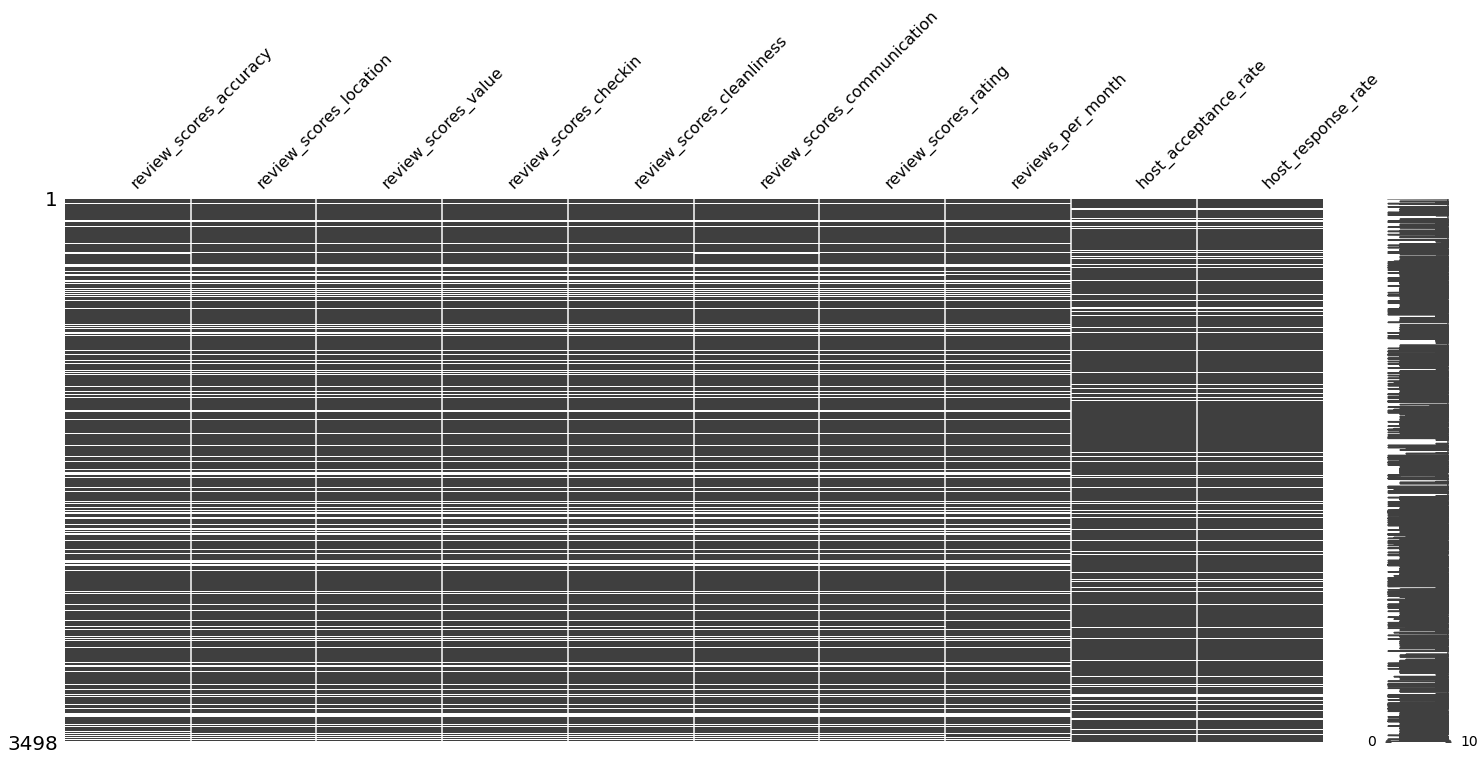

In [54]:
# Now we have a look at patterns in missing values for rest of columns
import missingno as msno
lt_50_perc_gt_0_perc = gt_50_perc[(gt_50_perc > 0) & (gt_50_perc < 50)]
msno.matrix(df_listings[list(lt_50_perc_gt_0_perc.index)])
plt.show()

In fact, there is a pattern of missing values between first 8 columns. You can see in white horizontal lines. These are all on same height witch same pattern. Also last two columns are systematicly missing. This is called NMAR (Not Missing At Random). Can be there was an error in data processing which we can´t reflect now. Once we could add an Missing Indicator column (Univariate Data), but this would not work for every column. So easiest way we could drop missing values and hope, we have enough data for prediction of price with regression. Before, we also verify distribution. 

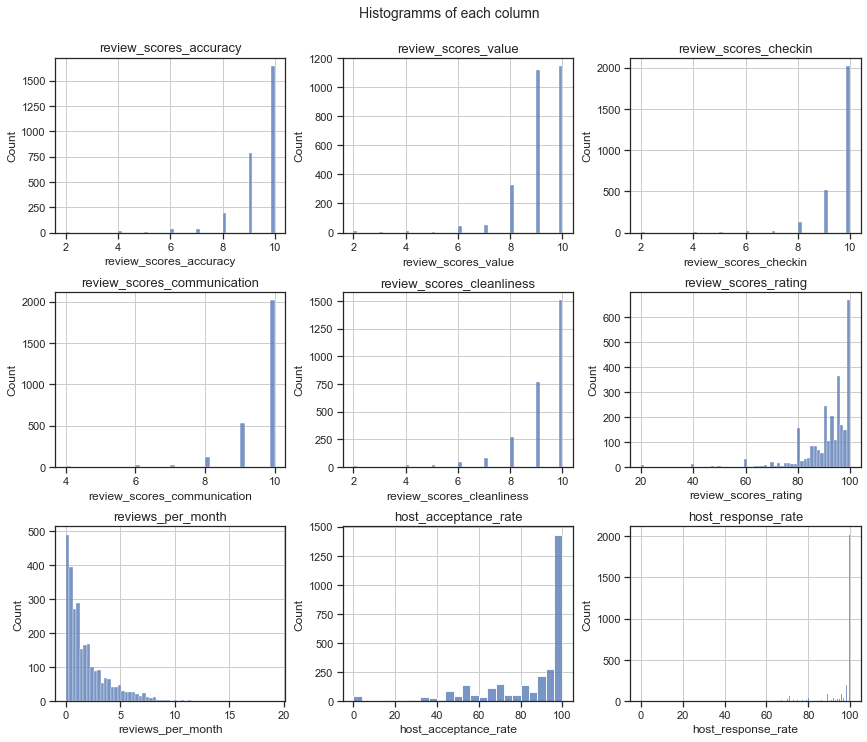

In [55]:
sns.set_theme(style="ticks")
plt.rc('axes', labelsize=12)
fig, axes = plt.subplots(3, 3, figsize=(12, 10))
fig.suptitle('Histogramms of each column', y=1.01, fontsize=14)

fig.tight_layout(h_pad=3)
fig.subplots_adjust(wspace=0.25)

sns.histplot(ax=axes[0,0], data=df_listings, x='review_scores_accuracy')
axes[0,0].set_title('review_scores_accuracy', fontsize=13)
axes[0,0].grid()

sns.histplot(ax=axes[0,1], data=df_listings, x='review_scores_value')
axes[0,1].set_title('review_scores_value', fontsize=13)
axes[0,1].grid()

sns.histplot(ax=axes[0,2], data=df_listings, x='review_scores_checkin')
axes[0,2].set_title('review_scores_checkin', fontsize=13)
axes[0,2].grid()

sns.histplot(ax=axes[1,0], data=df_listings, x='review_scores_communication')
axes[1,0].set_title('review_scores_communication', fontsize=13)
axes[1,0].grid()

sns.histplot(ax=axes[1,1], data=df_listings, x='review_scores_cleanliness')
axes[1,1].set_title('review_scores_cleanliness', fontsize=13)
axes[1,1].grid()

sns.histplot(ax=axes[1,2], data=df_listings, x='review_scores_rating')
axes[1,2].set_title('review_scores_rating', fontsize=13)
axes[1,2].grid()

sns.histplot(ax=axes[2,0], data=df_listings, x='reviews_per_month')
axes[2,0].set_title('reviews_per_month', fontsize=13)
axes[2,0].grid()

sns.histplot(ax=axes[2,1], data=df_listings, x='host_acceptance_rate')
axes[2,1].set_title('host_acceptance_rate', fontsize=13)
axes[2,1].grid()

sns.histplot(ax=axes[2,2], data=df_listings, x='host_response_rate')
axes[2,2].set_title('host_response_rate', fontsize=13)
axes[2,2].grid()

Values are not normal distributed. That means we shouldn´t use mean to fill null values. By skewed distribution its better take median. But it´s not reliable, because more than 5% of data is missing. Best and easiest way is dropping null values.

In [56]:
amount_before = df_listings.shape[0]
df_listings.dropna(how='any', axis=0, inplace=True)
amount_after = amount_before - df_listings.shape[0]
print('The resulting amount of rows: {0}'.format(amount_before))
print('Means we lost almost {} rows'.format(amount_after))

The resulting amount of rows: 3498
Means we lost almost 1005 rows


In [57]:
# Besides there is the code, if you want fill with modus i.e. (Hint: If take this, the result of our model is worse.)
#fill_mean_col = ['review_scores_rating','review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
#                 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month',
#                 'host_response_rate', 'host_acceptance_rate']
#
#for col in fill_mean_col:
#    df_listings[col].fillna(df_listings[col].mode(), axis = 0, inplace = True)

In [58]:
any(df_listings.isnull().sum())  # check last time about null values in df_listings

False

Further we create dummy variables for some of columns as test. If there is a good correlation, eventually we could use them.

In [59]:
# get dummiy variables for "f" and "t"
df_listings['superhost'] = pd.get_dummies(df_listings['host_is_superhost'], prefix='superhost', drop_first=True)
df_listings['host_has_profile_pic'] = pd.get_dummies(df_listings['host_has_profile_pic'], prefix='with_profile_pic', drop_first=True)
df_listings['instant_bookable'] = pd.get_dummies(df_listings['instant_bookable'], prefix='instant_bookable', drop_first=True)

# Correlation

Now we make correlation and show results in heatmap.

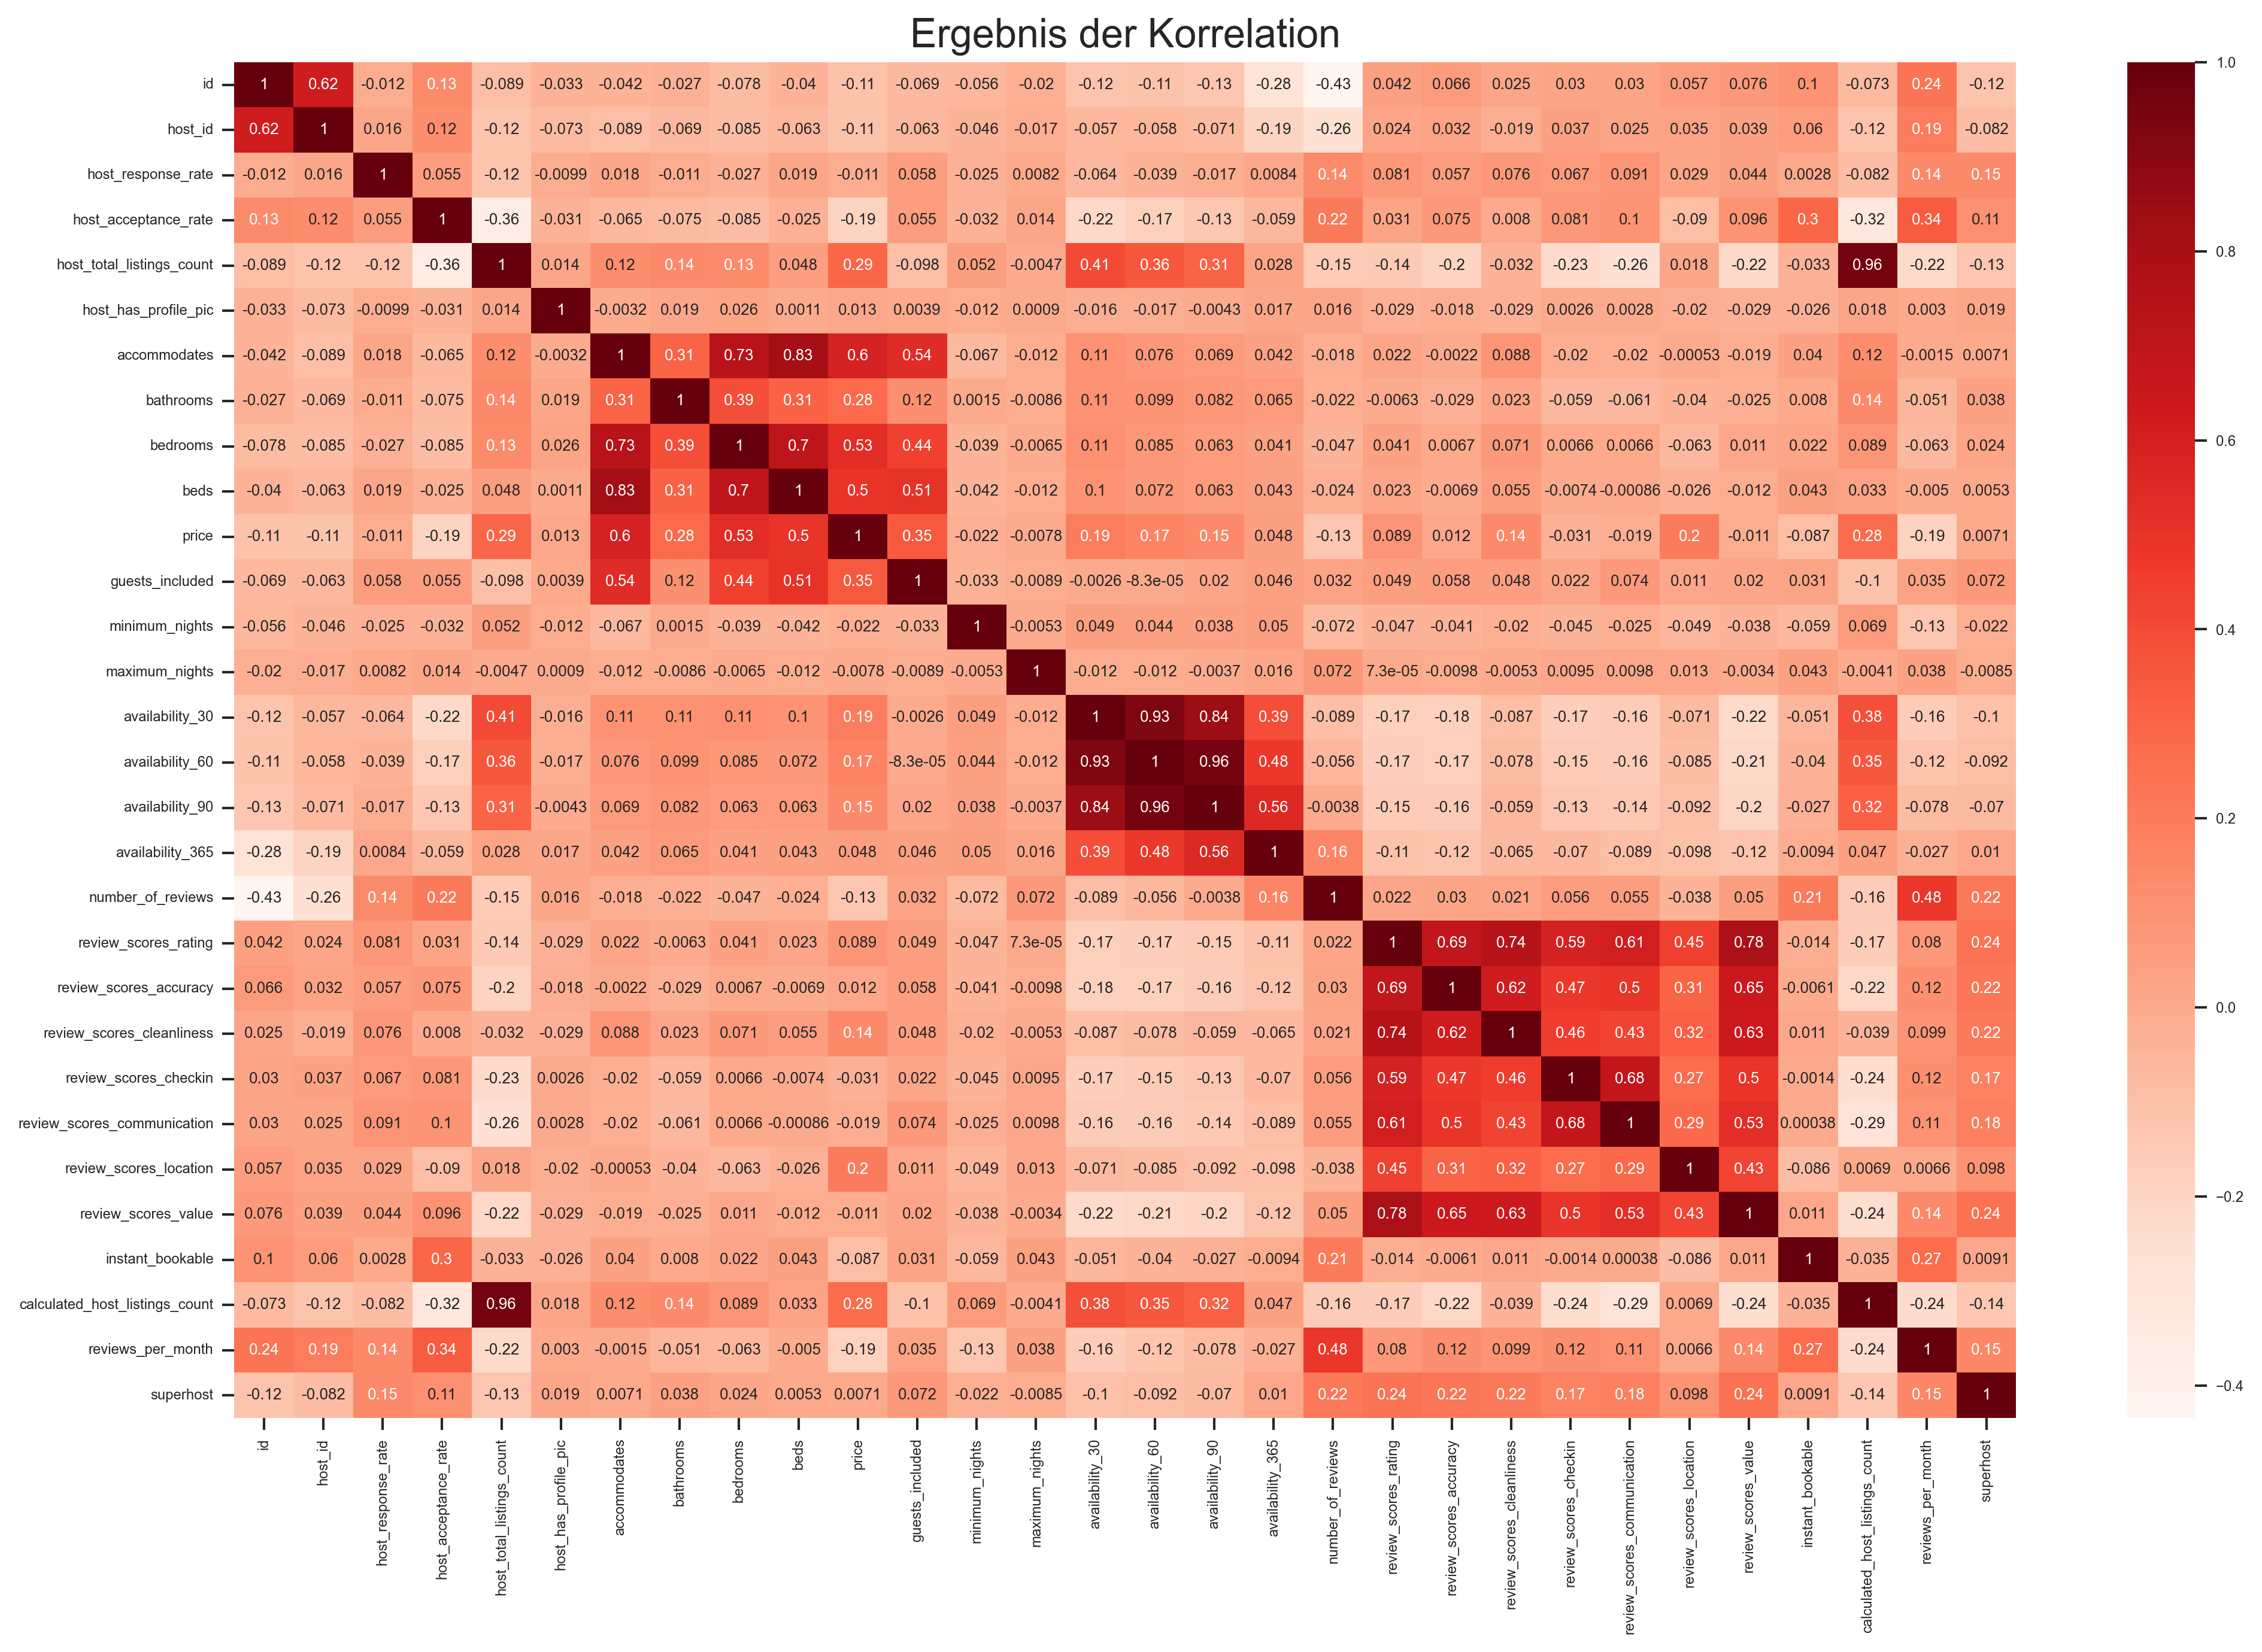

In [60]:
plt.figure(figsize=(16,10), dpi = 300)
sns.set_context('paper', font_scale=0.65)
h = sns.heatmap(df_listings.corr(), annot=True, cmap='Reds')
h.set_title('Ergebnis der Korrelation', y=1, fontsize=16)
plt.show()

Highest Correlation make prediction of price with accommodates about r=0.6 (Pearson Coeff.). Second strongest Correlation is with bedrooms r = 0.53 and third strongest with beds r=0.5. Now we verify VIF factor, to exclude colinearity between independent variables.

In [61]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
y, X = dmatrices("price ~ + accommodates + bedrooms + beds + bathrooms", data = df_listings, return_type ="dataframe")

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,8.0,Intercept
1,3.7,accommodates
2,2.4,bedrooms
3,3.3,beds
4,1.2,bathrooms


Results are fine. VIF < 4.0 for each column, thats nice. We can take this columns for our model and make a multiple correlation. Before we have a look at scatter plots and display trends.

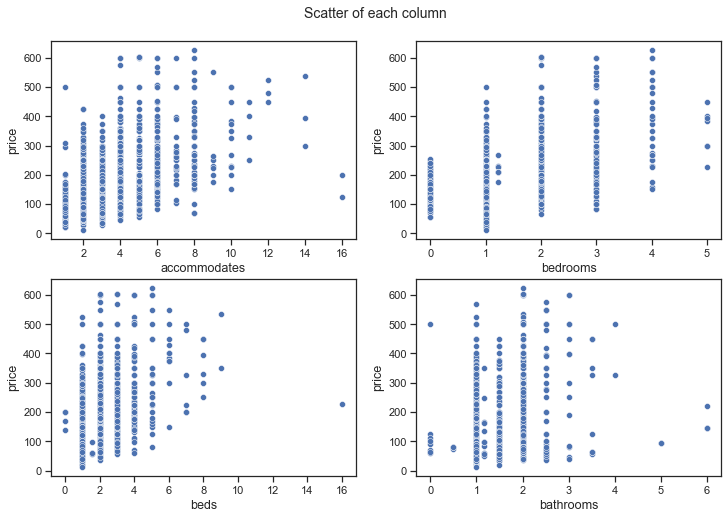

In [62]:
sns.set_theme(style="ticks")
plt.rc('axes', labelsize=12.5)
fig, ax = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Scatter of each column', y=0.94, fontsize=14)

sns.scatterplot(ax=ax[0,0], data=df_listings, x='accommodates', y='price')
axes[0,0].set_title('accommodates')
axes[0,0].grid()

sns.scatterplot(ax=ax[0,1], data=df_listings, x='bedrooms', y='price')
axes[0,1].set_title('bedrooms')
axes[0,1].grid()

sns.scatterplot(ax=ax[1,0], data=df_listings, x='beds', y='price')
axes[1,0].set_title('beds')
axes[1,0].grid()

sns.scatterplot(ax=ax[1,1], data=df_listings, x='bathrooms', y='price')
axes[1,1].set_title('bathrooms')
axes[1,1].grid()

# Zeige alle Plots
plt.show()

Result isn´t so nice. We can see that we have outliers in beds and bathrooms. For extra task we could check Homoscedasticity, but it´s your turn to check. This would go to far here. (Hint: For this you can use i. e. Breusch-Pagan-Testing or White-Testing). Now we make first shot with our model.

In [63]:
import statsmodels.formula.api as smf
lm_life_expectancy = smf.ols("price ~ + accommodates + bedrooms + beds + bathrooms", data = df_listings).fit()
# Ausgabe
print(lm_life_expectancy.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     381.2
Date:                Sat, 09 Sep 2023   Prob (F-statistic):          2.81e-256
Time:                        00:24:25   Log-Likelihood:                -14422.
No. Observations:                2493   AIC:                         2.885e+04
Df Residuals:                    2488   BIC:                         2.888e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       42.0939      4.471      9.416   

Nearly 38% of prices will be explained by independent variables accommodates, bedrooms, beds and bathrooms.

In [64]:
df_listings = df_listings[df_listings['beds'] < 10]
df_listings['beds'].max()

9.0

In [65]:
df_listings = df_listings[df_listings['accommodates'] < 14]
df_listings['accommodates'].max()

12

In [66]:
df_listings = df_listings[df_listings['bathrooms'] < 5]
df_listings['bathrooms'].max()

4.0

On basis of Scatter plots the borders for bedrooms, bathrooms and beds were estimated. Also it´s possible take IQR - Rule or something else. Now we can make a second shoot.

In [72]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
y, X = dmatrices("price ~ + accommodates + bedrooms + beds + bathrooms", data = df_listings, return_type ="dataframe")

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,9.2,Intercept
1,3.7,accommodates
2,2.5,bedrooms
3,3.5,beds
4,1.2,bathrooms


In [73]:
import statsmodels.formula.api as smf
lm_life_expectancy = smf.ols("price ~ + accommodates + bedrooms + beds + bathrooms", data = df_listings).fit()
# Ausgabe
print(lm_life_expectancy.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     397.0
Date:                Sat, 09 Sep 2023   Prob (F-statistic):          1.92e-264
Time:                        00:28:24   Log-Likelihood:                -14326.
No. Observations:                2481   AIC:                         2.866e+04
Df Residuals:                    2476   BIC:                         2.869e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       35.1435      4.738      7.417   

Nearly 39% of the prices will be explained by independent variables accommodates, bedrooms, beds and bathrooms.
Now it´s your turn to improve the model!

Last Step we want predict prices on basis of bathrooms and bedrooms.

In [75]:
import statsmodels.formula.api as smf
lm_life_expectancy = smf.ols("price ~ + bedrooms + bathrooms", data = df_listings).fit()
# Ausgabe
print(lm_life_expectancy.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     509.5
Date:                Sat, 09 Sep 2023   Prob (F-statistic):          4.57e-186
Time:                        00:31:13   Log-Likelihood:                -14513.
No. Observations:                2481   AIC:                         2.903e+04
Df Residuals:                    2478   BIC:                         2.905e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     55.6326      4.987     11.154      0.0

Nearly 29% of the prices will be explained by independent variables bedrooms and bathrooms. From this it can be derived, if further data is available in future, we could get better results. For example the amount of other rooms or more data in square feet. Now it´s your turn to improve the model!